In [1]:
%load_ext autoreload
%autoreload 2

import compression as C
import backports.lzma as lzma
import numpy as np

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

# ac3 = C.Util.load_data('ac3', -1)

# maybe this can be tuned
LZMA_filters = [{"id": lzma.FILTER_LZMA1, "preset": lzma.PRESET_EXTREME}]


/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
cyl = C.Util.load_data('cylinder', -1)

In [15]:
cyl.shape

(300, 2048, 2048)

In [2]:
import nibabel

In [3]:
a = nibabel.load('/tmp/aparc+aseg.mgz')

In [4]:
def seg_to_color(slice):
   colors = np.zeros(slice.shape+(3,),dtype=np.uint8)
   colors[:,:,0] = np.mod(107*slice[:,:],700).astype(np.uint8)
   colors[:,:,1] = np.mod(509*slice[:,:],900).astype(np.uint8)
   colors[:,:,2] = np.mod(200*slice[:,:],777).astype(np.uint8)
   return colors

In [5]:
a = a.get_data()

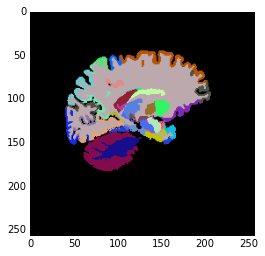

In [6]:
imshow(seg_to_color(a[110]))

In [3]:
# C.Util.run_experiments(a.astype(np.uint64).copy(order='C'), N=1, com_alg=[C.LZMA], enc_alg=[C.NG])
C.Util.run_experiments(cyl, N=1, com_alg=[C.LZMA], enc_alg=[C.NG])

MemoryError: 

Boundary Encoding: 665.010444537
  201828
Neuroglancer: 60.9929762822
  2200544
LZMA: 748.73216557
  179260
LZMA: 454.78418563
  295124


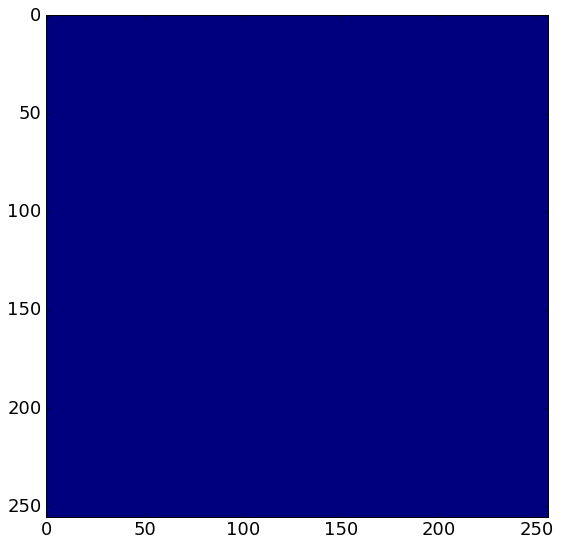

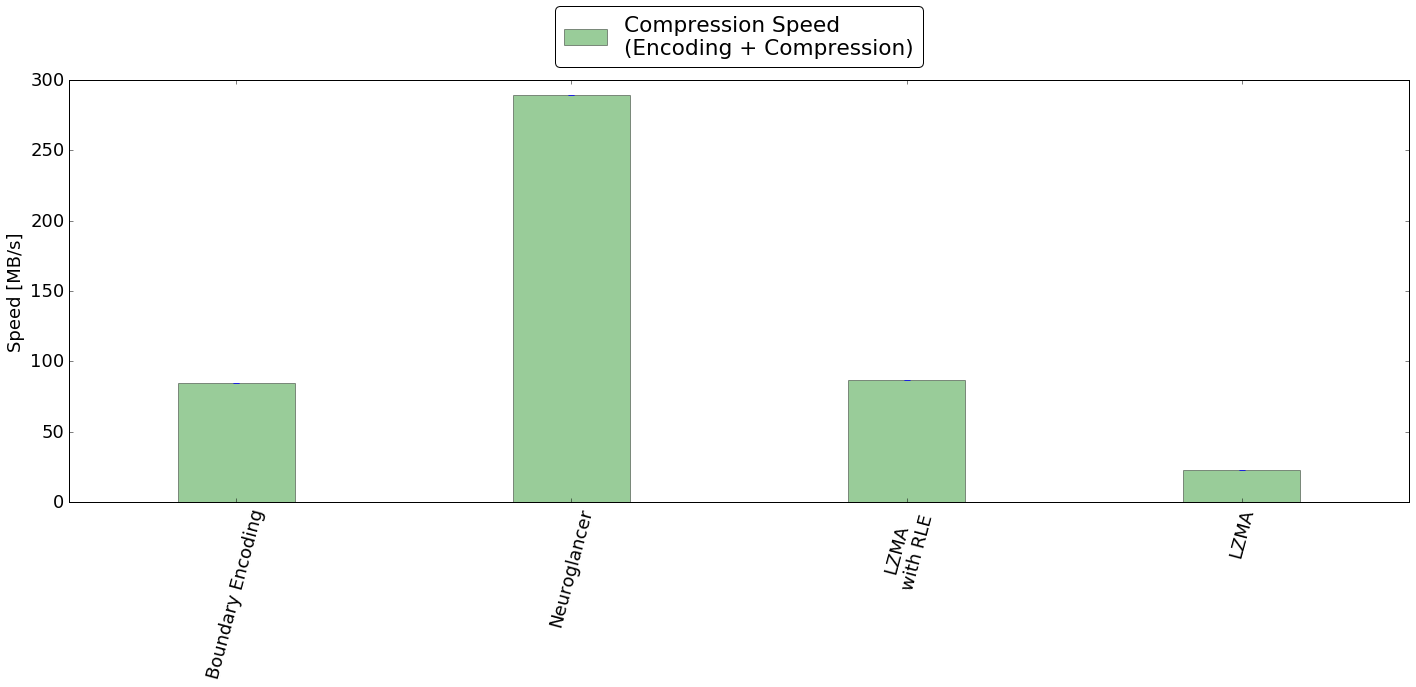

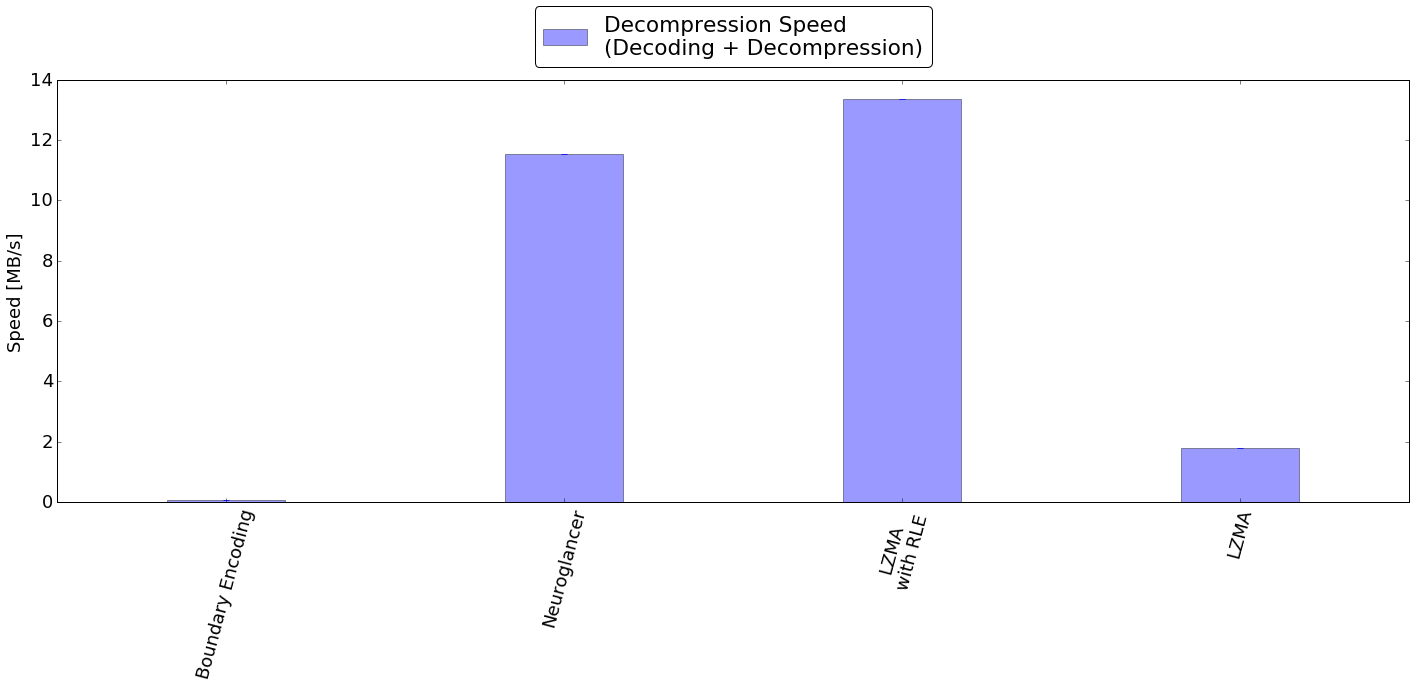

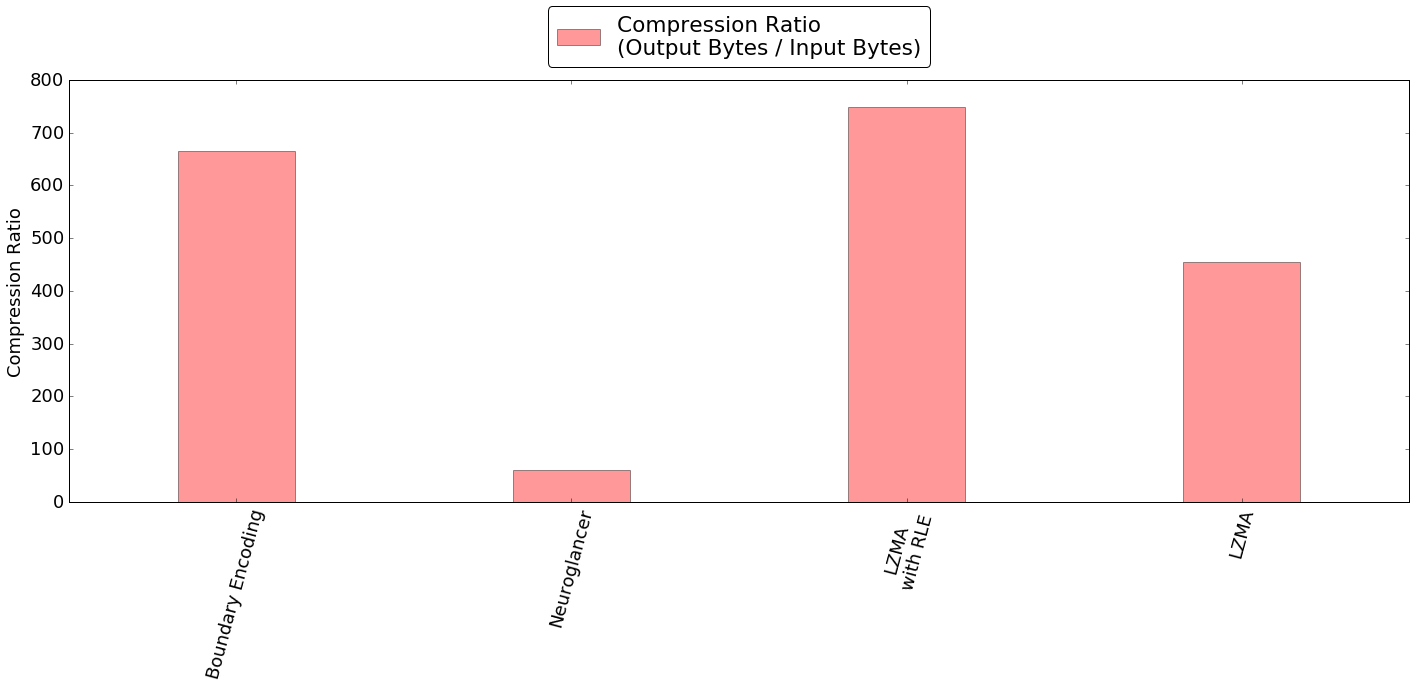

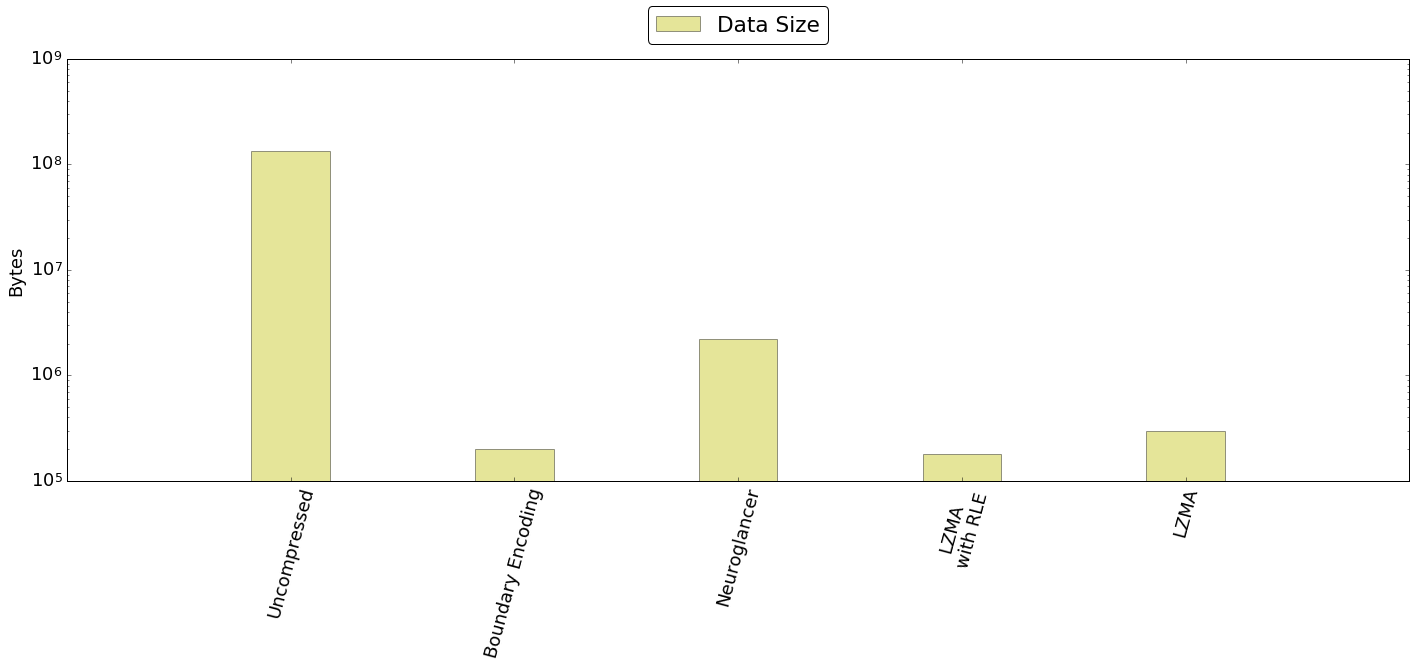

In [38]:
C.Util.run_experiments(a.astype(np.uint64).copy(order='C'), N=1, com_alg=[C.boundary_encoding, C.NG, C.LZMA], enc_alg=[C.RLE, C.NE])

In [32]:
a.dtype

dtype('>i4')

In [350]:
total_bytes = 0

i_shape, delta_indices, indices, data = C.SRLE.encode(ac3[0])

# we store the depth,width,height
total_bytes += C.Util.get_size(i_shape)
print total_bytes
# split delta_indices since the first column has larger values
delta_indices_first_col = delta_indices[:,0]
delta_indices_rest = delta_indices[:,1:]
print 'indices',C.Util.get_size(C.LZMA.compress(indices, format=lzma.FORMAT_RAW, filters=LZMA_filters))

# print 'indices',C.Util.get_size(C.LZMA.compress(delta_indices, format=lzma.FORMAT_RAW, filters=LZMA_filters))
# print 'indices',C.Util.get_size(C.LZMA.compress(delta_indices_first_col.copy(order='C'), format=lzma.FORMAT_RAW, filters=LZMA_filters))

# print 'indices',C.Util.get_size(C.LZMA.compress(delta_indices_rest.copy(order='C'), format=lzma.FORMAT_RAW, filters=LZMA_filters))


ui8, ui16, ui32, ui64 = C.Extract.encode(delta_indices)
p_ui8 = C.Pack.encode(ui8)
total_bytes += C.Util.get_size(C.LZMA.compress(p_ui8[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))
print total_bytes
total_bytes += C.Util.get_size(C.LZMA.compress(ui16, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print total_bytes
total_bytes += C.Util.get_size(C.LZMA.compress(ui32, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print total_bytes
total_bytes += C.Util.get_size(C.LZMA.compress(ui64, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print total_bytes

packed_data = C.Pack.encode(data)
print C.Util.get_size(C.LZMA.compress(packed_data[1],format=lzma.FORMAT_RAW, filters=LZMA_filters))
#print C.Util.get_size(C.LZMA.compress(data,format=lzma.FORMAT_RAW, filters=LZMA_filters))

print total_bytes

4
indices 15399
16248
16715
16725
16735
2974
3627
16735


In [351]:
C.Pack.decode(packed_data)

TypeError: decode() takes at least 2 arguments (1 given)

In [314]:
C.Util.get_size(C.LZMA.compress(indices), format=lzma.FORMAT_RAW, filters=LZMA_filters))

SyntaxError: invalid syntax (<ipython-input-314-1ba50343f6ee>, line 1)

In [334]:
C.Util.get_size(C.LZMA.compress(C.Pack.encode(delta_indices_rest.copy(order='C'),
                                              include_delimiter=False)[1],
                                            format=lzma.FORMAT_RAW,
                                            filters=LZMA_filters))

14505

In [294]:
C.Util.get_size(C.LZMA.compress(packed_data[1],format=lzma.FORMAT_RAW, filters=LZMA_filters))

2974

In [301]:
C.Util.get_size(C.LZMA.compress(p_ui8[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))


15690

In [172]:
delta_indices[0:3]

array([[ 670,   53,   27,    9,   35,   49,   65,   84,   22,   10,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 671,   54,   26,    9,   32,    4,   48,   64,   83,   23,   10,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [1015,    9,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0]], dtype=uint64)

In [231]:
adata = C.SRLE.encode(ac3[0])

In [234]:
adata.shape

(1024, 76)

In [206]:
adata[:,-5].max()

2007

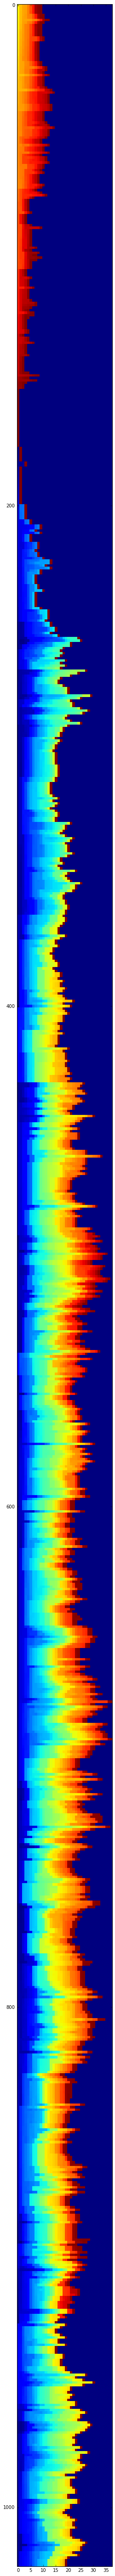

In [318]:
plt.figure(figsize=(10,100))
imshow(indices,interpolation='nearest')

In [319]:
a =C.Pack.encode(indices, include_delimiter=False)


In [321]:
a[1].shape

(20555,)

In [167]:
np.where(aaa[2:]==1024)[0][0]

18

In [177]:
indices = C.Delta.decode(delta_indices)

In [179]:
indices.shape

(1024, 38)

In [147]:
ac3[0][0:20]

array([[3036, 3036, 3036, ..., 4458, 4458, 4458],
       [3036, 3036, 3036, ..., 4458, 4458, 4458],
       [3036, 3036, 3036, ..., 4458, 4458, 4458],
       ..., 
       [3036, 3036, 3036, ..., 3822, 3822, 3822],
       [3036, 3036, 3036, ..., 3822, 3822, 3822],
       [3036, 3036, 3036, ..., 3822, 3822, 3822]], dtype=uint64)

In [253]:
shape, delta_indices, data = C.SRLE.encode(ac3[0])

In [247]:
shape

array([1024, 1024], dtype=uint16)

In [272]:
X=C.SRLE.decode(shape, delta_indices, data)
np.array_equal(ac3[0], X)

True

In [122]:
ac3[0]

array([[3036, 3036, 3036, ..., 4458, 4458, 4458],
       [3036, 3036, 3036, ..., 4458, 4458, 4458],
       [3036, 3036, 3036, ..., 4458, 4458, 4458],
       ..., 
       [3631, 3631, 3631, ..., 3669, 3669, 3669],
       [3631, 3631, 3631, ..., 3669, 3669, 3669],
       [3631, 3631, 3631, ..., 3669, 3669, 3669]], dtype=uint64)

In [288]:
all = i_shape.tobytes() + p_ui8[1].tobytes() + ui16.tobytes() + ui32.tobytes() + ui64.tobytes() + packed_data[1].tobytes()

In [68]:
ui64.tobytes()

''

In [290]:
 C.Util.get_size(C.LZMA.compress(all,format=lzma.FORMAT_RAW, filters=LZMA_filters))

18933

In [291]:
 C.Util.get_size(C.LZMA.compress(packed_data[1].tobytes(),format=lzma.FORMAT_RAW, filters=LZMA_filters))

2974

In [44]:
C.Util.get_size(C.LZMA.compress(data,format=lzma.FORMAT_RAW, filters=LZMA_filters))

4929

In [34]:
C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[0:1]), format=lzma.FORMAT_RAW, filters=LZMA_filters))

15454

In [42]:
C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[0:1])))

15396

In [16]:
data_swapped = np.swapaxes(data, 0, 1)
data_swapped_3d = np.expand_dims(data_swapped,0)
i_shape2, indices2, delta_indices2, data2 = C.SRLE.encode(data_swapped_3d[0:1])

1576

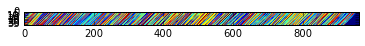

In [39]:
imshow(data2)

In [20]:
data_swapped_3d

array([[[3036, 3036, 3822, ..., 1326, 5917, 2025],
        [4381, 4381, 4458, ..., 3141, 1326, 5295],
        [ 434,  434,    0, ...,  477, 2964, 2833],
        ..., 
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]]], dtype=uint16)

In [23]:
C.Util.get_size(C.Pack.encode(data)[1])

13559

In [32]:
type(i_shape).__module__ == np.__name__

True